In [64]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("train.csv")

LotArea outliers: 69
LotArea skew: 12.207687851233496
LotArea correlation: 0.26384335387140573
GrLivArea outliers: 31
GrLivArea skew: 1.3665603560164552
GrLivArea correlation: 0.7086244776126522
TotalBsmtSF outliers: 61
TotalBsmtSF skew: 1.5242545490627664
TotalBsmtSF correlation: 0.6135805515591956
GarageArea outliers: 21
GarageArea skew: 0.17998090674623907
GarageArea correlation: 0.6234314389183617


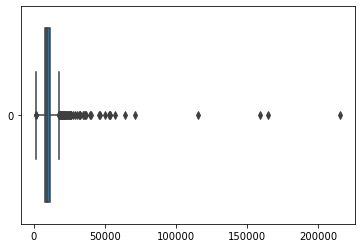

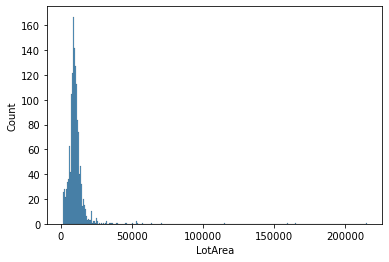

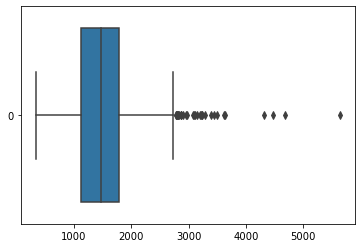

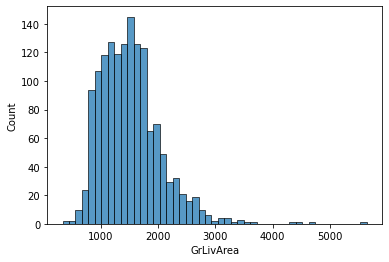

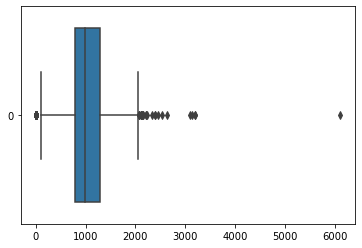

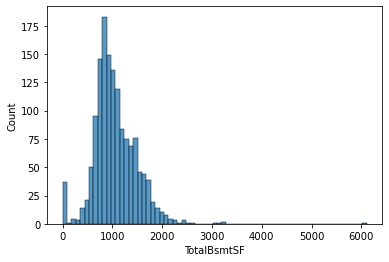

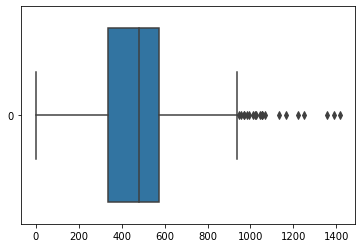

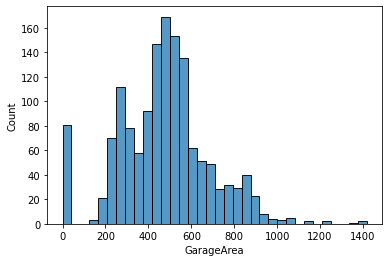

In [84]:
items = ['LotArea', 'GrLivArea', 'TotalBsmtSF', 'GarageArea']
for x in items:
    data = df[x]
    plt.figure()
    sb.boxplot(data=data,orient='h')
    count=0
    IQR = 1.5*(data.quantile(.75)-data.quantile(.25))
    for i in data:
        if i > data.quantile(.75)+IQR: count+=1
        elif i< data.quantile(.25)-IQR: count+=1
    print(x +" outliers: "+ str(count))
    print(x + " skew: " +str(data.skew()))
    print(x + " correlation: "+str(df["SalePrice"].corr(data)))
    plt.figure()
    sb.histplot(data=data)

In [ ]:
"""
MSSubclass - 16 lvls
Neighbourhood - 25 lvls
BldgType - 5 lvls
OverallQual - 10 lvls
"""

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64
1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64
5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64


<Figure size 432x288 with 0 Axes>

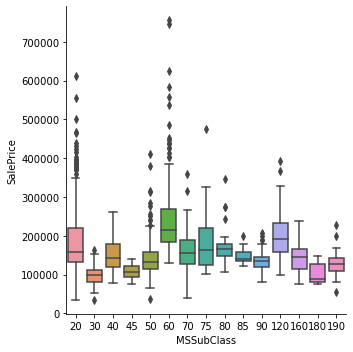

<Figure size 432x288 with 0 Axes>

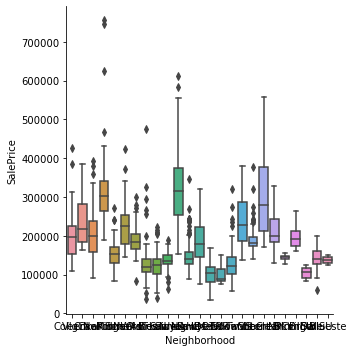

<Figure size 432x288 with 0 Axes>

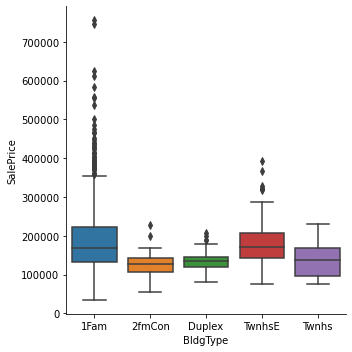

<Figure size 432x288 with 0 Axes>

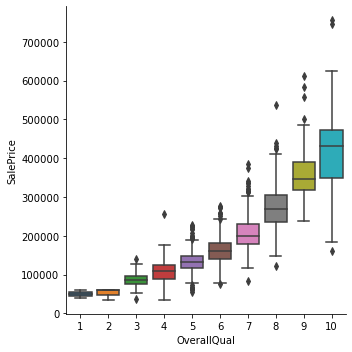

In [96]:
items = ['MSSubClass', 'Neighborhood', 'BldgType', 'OverallQual']
for i in items:
    lvls = df[i]
    print(lvls.value_counts())
    plt.figure()
    sb.catplot(x=i,y="SalePrice",kind="box",data=df)


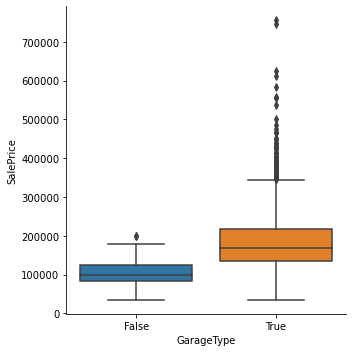

In [111]:
data = df["GarageType"].notna()
data = pd.concat([data, df["SalePrice"]],axis=1)
sb.catplot(x="GarageType", y="SalePrice",kind="box",data=data)
